# Trade
This notebook trades with the hyperparameters selected in the previous over the full set of trading data.

Note that in reality the byperparameter tunning could be repeated every trading day but we will ignore that complication.

#### Import necessary modules

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import boto3
from IPython.display import Image
import math
import numpy as np
import pandas as pd
from sagemaker import get_execution_role
from sagemaker.estimator import Estimator
from sagemaker.session import Session
import seaborn as sns; sns.set()
import shutil
from time import sleep

#### Set for local parameters

In [5]:
n_instances = 1
#image_type = 'cpu'
#instance_type = 'ml.m5.large'

image_type = 'gpu'
instance_type = 'ml.g4dn.xlarge'

hyperparameters = {'start_day': 2670,
                   'days_per_epoch': 40,
                   'fc1': 13,
                   'fc2': 0,
                   'lr_actor': 0.00039,
                   'lr_critic': 0.00356}

train_use_spot_instances = True
train_max_run = 14400
train_max_wait = 14400 if train_use_spot_instances else None

sagemaker_session = Session()
bucket_name = sagemaker_session.default_bucket()
role = get_execution_role()
account = boto3.client('sts').get_caller_identity()['Account']
region = boto3.Session().region_name
image_name = '{}.dkr.ecr.{}.amazonaws.com/portfolio-optimization-{}:latest'.format(account, region, image_type)

#### Submit the job

In [6]:
estimator = Estimator(role=role,
                      train_instance_count=n_instances,
                      train_instance_type=instance_type,
                      image_name=image_name,
                      hyperparameters=hyperparameters)
estimator.fit()


2020-07-23 02:13:48 Starting - Starting the training job...
2020-07-23 02:13:50 Starting - Launching requested ML instances.........
2020-07-23 02:15:28 Starting - Preparing the instances for training...
2020-07-23 02:16:15 Downloading - Downloading input data...
2020-07-23 02:16:21 Training - Downloading the training image.......bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2020-07-23 02:17:53,288 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2020-07-23 02:17:53,309 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2020-07-23 02:17:53,517 sagemaker_pytorch_container.training INFO     Invoking user training script.
2020-07-23 02:17:53,518 sagemaker-containers INFO     Module train does not provide a setup.py. 
Generating setup.py
2020-07-23 02:17:53,518 sagemaker-containers INFO     Generating setup.cfg
2020-07-23 02:17:53,518 sagemaker-contain

#### Get the results

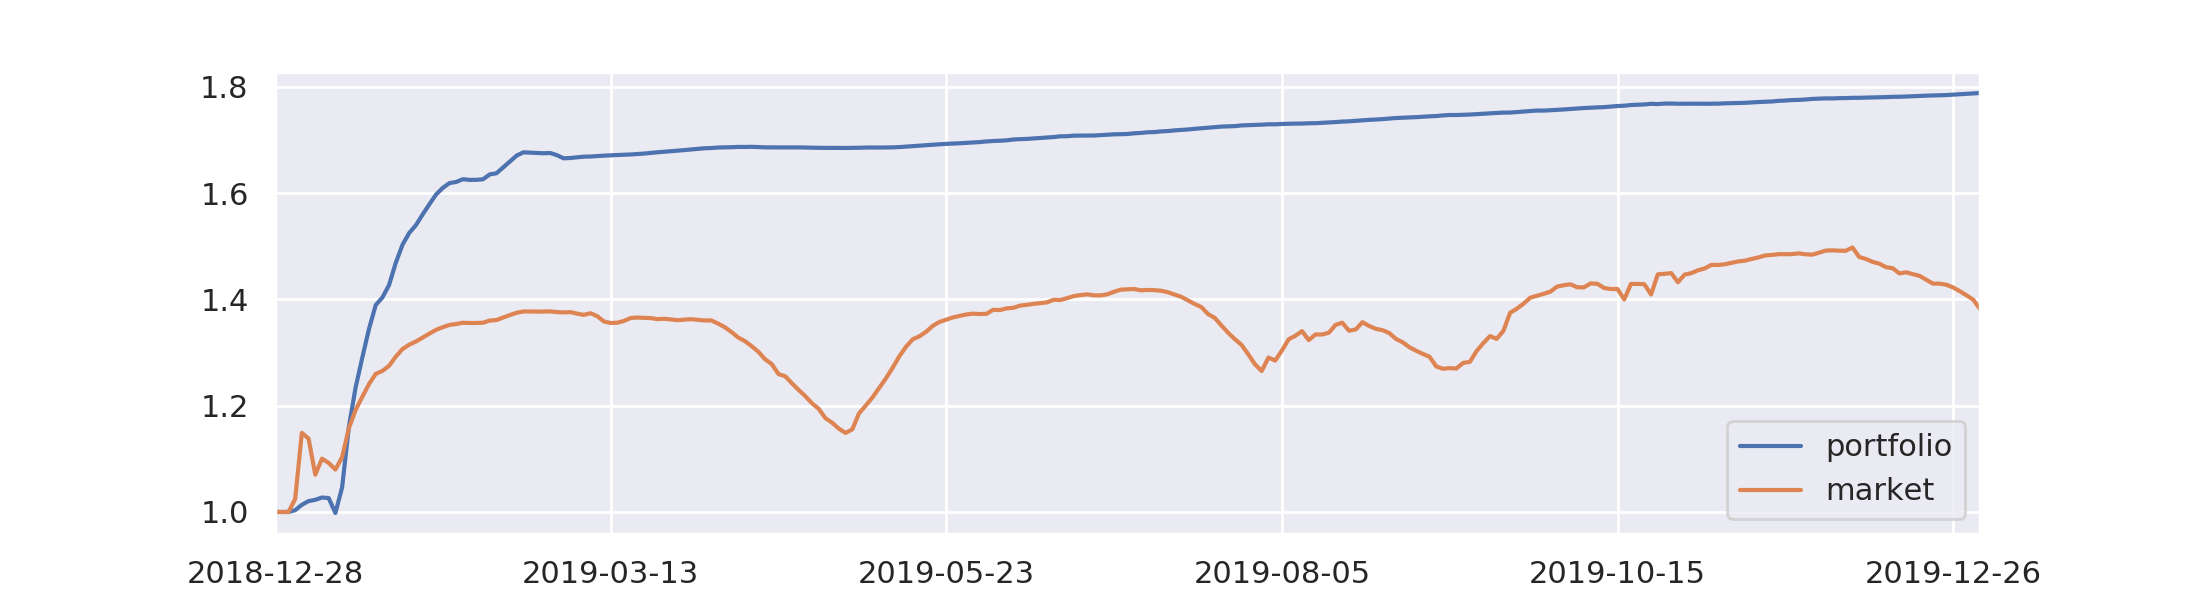

In [8]:
s3 = boto3.resource('s3')
key = '{}/output/output.tar.gz'.format(estimator._current_job_name)
s3.Bucket(bucket_name).download_file(key, 'output.tar.gz')
shutil.unpack_archive('output.tar.gz')
Image(filename='history.png') 

# Reference
- [Tennis Sensitivity](https://github.com/daniel-fudge/sagemaker-tennis/blob/master/sensitivity.ipynb)
- [Tennis Repo](https://github.com/daniel-fudge/sagemaker-tennis)
#### SageMaker
- [SageMaker Instance types](https://aws.amazon.com/sagemaker/pricing/instance-types/)
- [SageMaker Instance prices](https://aws.amazon.com/sagemaker/pricing/)
- [SageMaker Estimator SDK](https://sagemaker.readthedocs.io/en/stable/api/training/estimators.html)